In [23]:
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import sys
import os
import numpy as np
from itertools import chain
import json

In [24]:
sys.path.append('..')
from benchmark.synthetic_classification.model.lr import Model

In [25]:
global_model = Model()
local_model = Model()

In [26]:
global_model.state_dict()['layer.weight'].shape

torch.Size([10, 60])

In [29]:
global_path = '../checkpoint/synthetic_classification_cnum5_dist11_skew1.0_seed0/dist11/global'
local_path = '../checkpoint/synthetic_classification_cnum5_dist11_skew1.0_seed0/dist11/local'

In [30]:
plot_grad_list = []
grad_list = []
for i in range(20):
    global_model.load_state_dict(torch.load(os.path.join(global_path, f"round{i}/global_model.pt")))
    for j in range(5):
        local_model.load_state_dict(torch.load(os.path.join(local_path, f'round{i+1}/local_model{j}.pt')))
        
        grad_weight = global_model.state_dict()['layer.weight'] - local_model.state_dict()['layer.weight']
        grad_bias = global_model.state_dict()['layer.bias'] - local_model.state_dict()['layer.bias']
        grad_tensor = abs(grad_weight).sum() + abs(grad_bias).sum()
        grad_list.append(grad_tensor.item() / 610)
    plot_grad_list.append(grad_list)
    grad_list = []

plot_grad_list

[[0.5748862844998719,
  0.3842714403496414,
  0.2988345286885246,
  0.25158731429303277,
  0.21880598224577358],
 [0.3229095458984375,
  0.18617309820456582,
  0.13125687896228228,
  0.10321308823882556,
  0.08516593682961386],
 [0.24579697905993853,
  0.13863385309938525,
  0.09698461313716701,
  0.07570206689052894,
  0.06319338689084913],
 [0.20226804389328254,
  0.11363173938188396,
  0.07929753162821786,
  0.06188709696785348,
  0.05329557950379418],
 [0.17355016489497951,
  0.09796301419617699,
  0.06766783917536501,
  0.05388417478467597,
  0.04635498797307249],
 [0.15354020165615395,
  0.08699910523461514,
  0.06108749889936604,
  0.04811683091960969,
  0.04207585131535765],
 [0.13849917552510246,
  0.07945990015248783,
  0.05552987896028112,
  0.043649776646348296,
  0.03872502436403368],
 [0.12583526861472208,
  0.07279950126272733,
  0.05119675495585457,
  0.04056126016085265,
  0.03626801537685707],
 [0.11638691386238473,
  0.06785490942783043,
  0.04771146930632044,
  0.03

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)
np.set_printoptions(precision=8)

In [33]:
plot_grad_list = []
grad_list = []
for j in range(5):
    for i in range(50):
        global_model.load_state_dict(torch.load(os.path.join(global_path, f"round{i}/global_model.pt")))
        local_model.load_state_dict(torch.load(os.path.join(local_path, f'round{i+1}/local_model{j}.pt')))
        
        grad_weight = global_model.state_dict()['layer.weight'] - local_model.state_dict()['layer.weight']
        grad_bias = global_model.state_dict()['layer.bias'] - local_model.state_dict()['layer.bias']
        grad_tensor = torch.concat((torch.flatten(grad_weight), torch.flatten(grad_bias)))
        grad_list.append(grad_tensor)
    grad_list = [grad.tolist() for grad in grad_list]
    grad_list_arr = np.array(grad_list)
    transform_grad = pca.fit_transform(grad_list_arr)
    grad_list = []
    plot_grad_list.append(transform_grad)



In [34]:
plot_grad_list = np.array(plot_grad_list)
plot_grad_list

array([[[ 1.85157331e+01,  3.20017495e+00],
        [ 7.98474129e+00, -2.22368521e+00],
        [ 5.07751906e+00, -2.14595451e+00],
        [ 3.54780531e+00, -1.80906875e+00],
        [ 2.57205271e+00, -1.51361451e+00],
        [ 1.90085056e+00, -1.24531503e+00],
        [ 1.40577367e+00, -1.02235452e+00],
        [ 1.01188917e+00, -8.72820054e-01],
        [ 7.13616989e-01, -6.89435242e-01],
        [ 4.56054059e-01, -5.77430820e-01],
        [ 2.45908694e-01, -4.81037463e-01],
        [ 6.56978551e-02, -4.00855945e-01],
        [-8.28452658e-02, -2.89664204e-01],
        [-2.19285429e-01, -2.28825839e-01],
        [-3.33262779e-01, -1.53965822e-01],
        [-4.37919762e-01, -9.89780804e-02],
        [-5.32133103e-01, -6.69089295e-02],
        [-6.17903773e-01, -2.01374136e-02],
        [-7.00160970e-01, -6.92851351e-03],
        [-7.61562953e-01,  6.11848497e-02],
        [-8.22533592e-01,  1.13625276e-01],
        [-8.88355503e-01,  9.34212493e-02],
        [-9.33021772e-01,  1.731

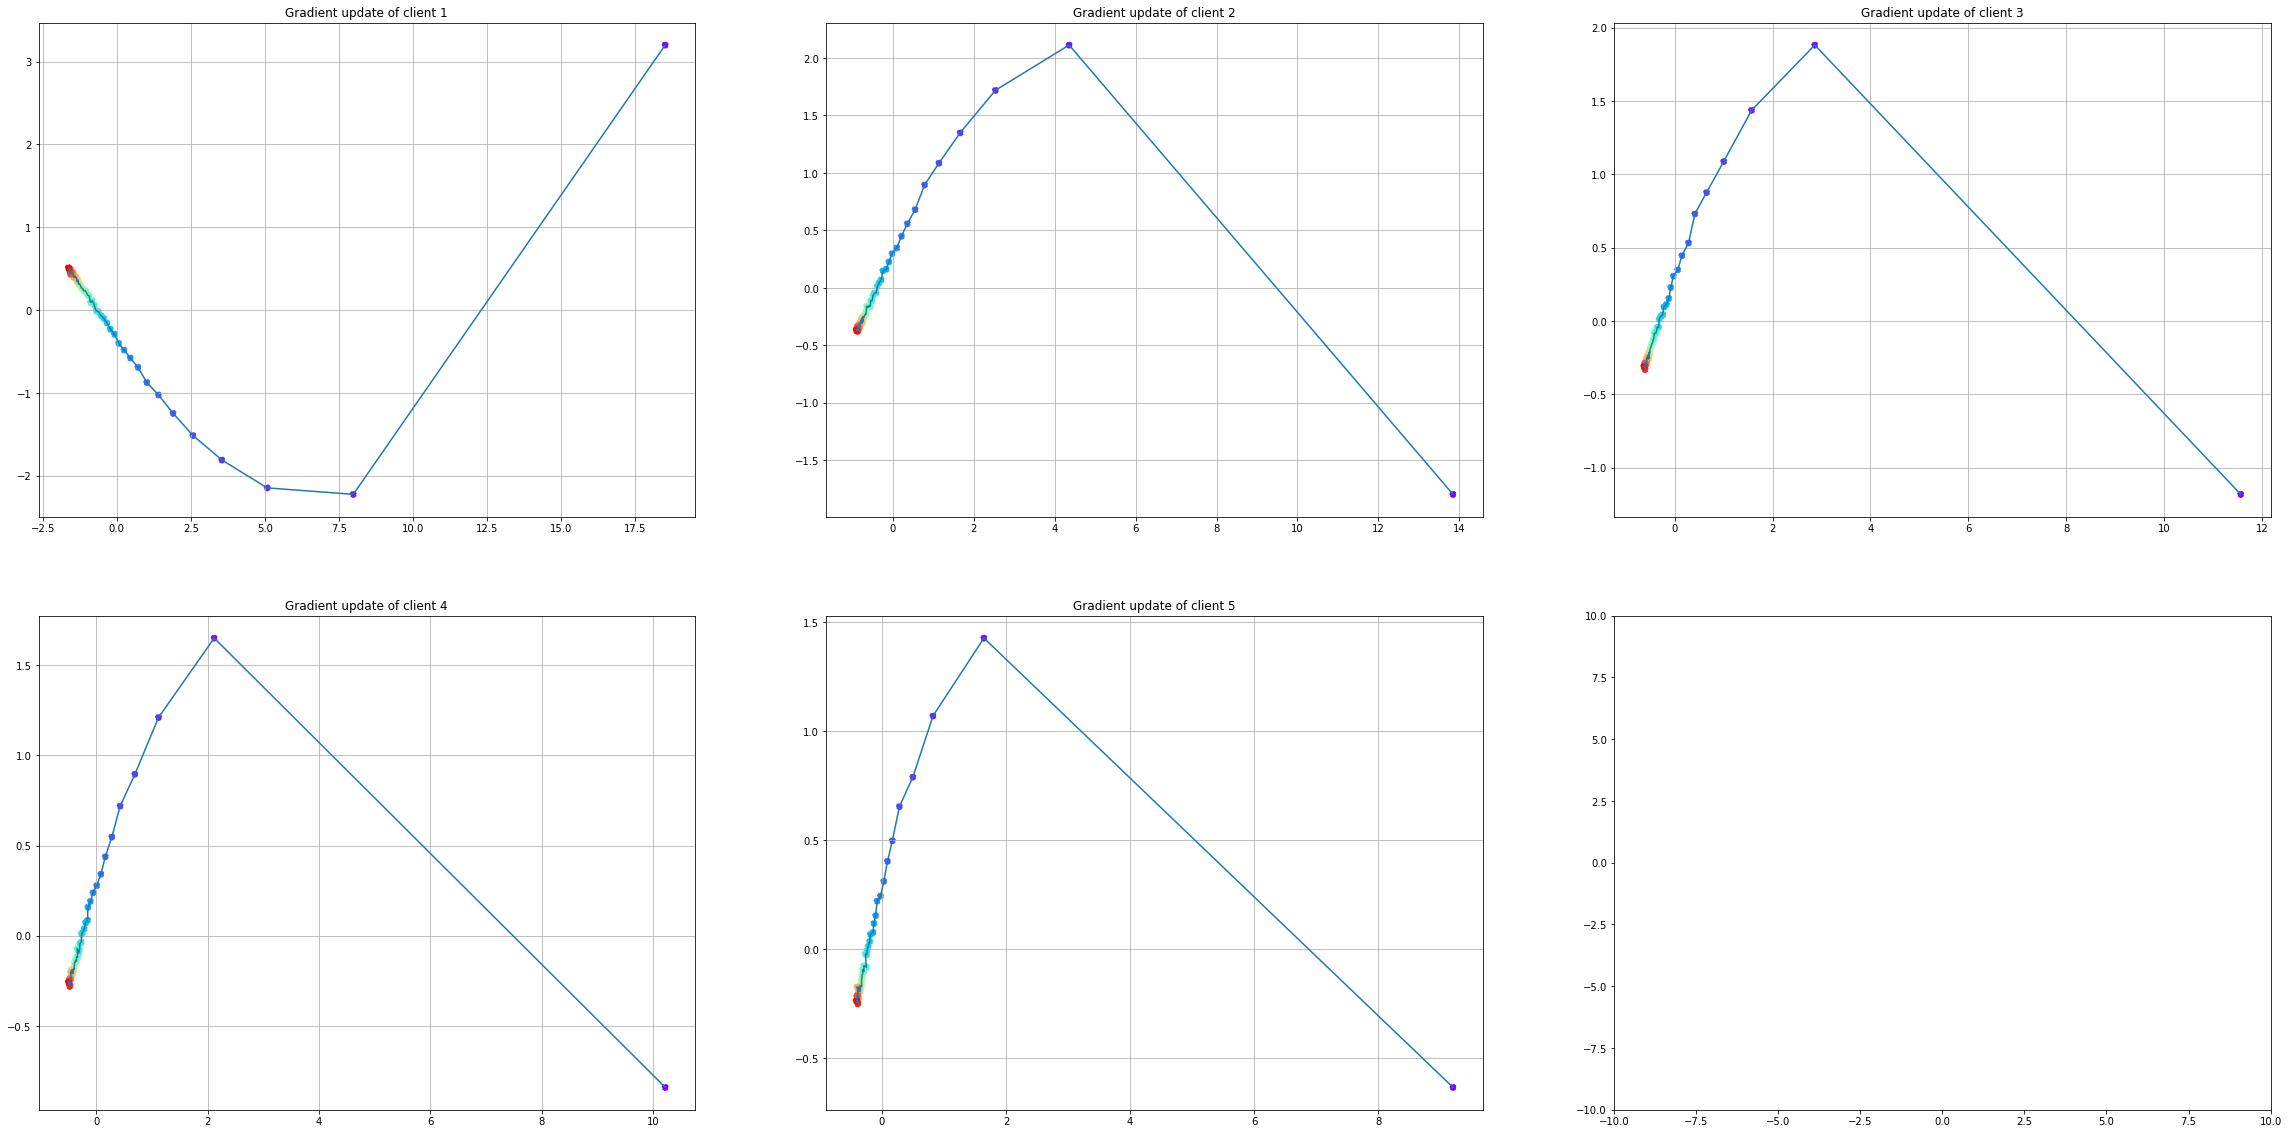

In [35]:
fig, axs = plt.subplots(2, 3, figsize=(40, 20))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
x, y = 0, 0

for j in range(5):
   color = cm.rainbow(np.linspace(0, 1, plot_grad_list[j].shape[0]))
   color_list = []
   for i, c in zip(range(plot_grad_list[j].shape[0]), color):
      color_list.append(c)

   axs[x, y].scatter(plot_grad_list[j][:, 0], plot_grad_list[j][:, 1], color=color_list, linestyle="--")
   axs[x, y].plot(plot_grad_list[j][:, 0], plot_grad_list[j][:, 1])
   axs[x, y].set_title(f'Gradient update of client {j+1}')
   axs[x, y].grid()
   if y < 2:
      y += 1
   else:
      y = 0
      x += 1
   # plt.grid()
   # plt.show()